In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn as skl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\seren\OneDrive\Desktop\2ndYear\SDS\SDSProject\master.csv')

## Describing our dataset

In [3]:
print("Dataset has", len(df['country'].unique()), 'countries out of 193')
print('Dataset has', len(df['year'].unique()),'years.')
print(min(df['year']), "-",max(df['year']))

Dataset has 101 countries out of 193
Dataset has 32 years.
1985 - 2016


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


In [5]:
df.describe(include=['O']) #Categorical data

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,female,35-54 years,Kiribati2000,"218,095,997,085",Generation X
freq,382,13910,4642,12,12,6408


In [6]:
df.describe() #Numerical data

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


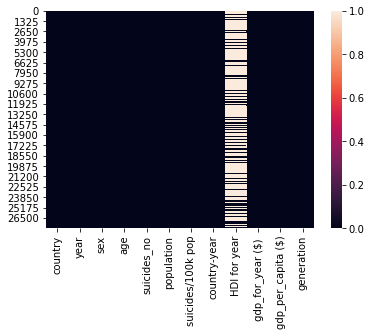

In [7]:
sns.heatmap(df.isnull())

## Data Cleaning

In [8]:
df.drop(['country-year'], axis='columns', inplace=True) #since country and year columns already exist

In [9]:
# Prepare dataframe for HDI processing
# done by removing all rows with null data
df_hdi = df.copy()
df_hdi.dropna(axis=0,inplace=True)
df_hdi.reset_index(inplace=True)
# df_hdi.drop(['index'], axis='columns', inplace=True)
df.drop(['HDI for year'], axis='columns', inplace=True)

In [10]:
df_hdi #dataframe for HDI processing 

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,72,Albania,1995,male,25-34 years,13,232900,5.58,0.619,"2,424,499,009",835,Generation X
1,73,Albania,1995,male,55-74 years,9,178000,5.06,0.619,"2,424,499,009",835,Silent
2,74,Albania,1995,female,75+ years,2,40800,4.90,0.619,"2,424,499,009",835,G.I. Generation
3,75,Albania,1995,female,15-24 years,13,283500,4.59,0.619,"2,424,499,009",835,Generation X
4,76,Albania,1995,male,15-24 years,11,241200,4.56,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
8359,27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
8360,27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
8361,27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
8362,27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [11]:
df #dataframe for suicide processing

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


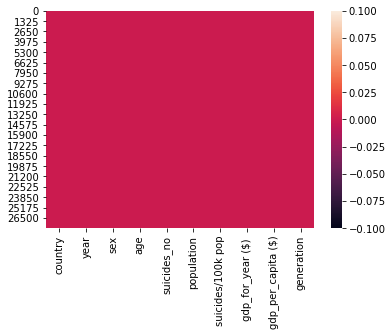

In [12]:
sns.heatmap(df.isnull()) #show all null values have been removed from suicide dataframe

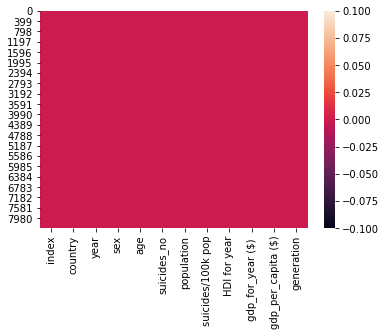

In [13]:
sns.heatmap(df_hdi.isnull()) #show all null values have been removed from HDI dataframe

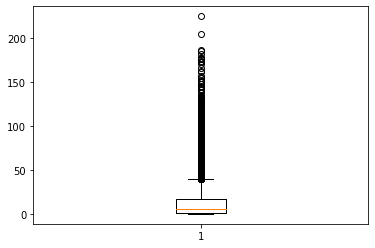

In [14]:
plt.boxplot(df['suicides/100k pop'])
plt.show()

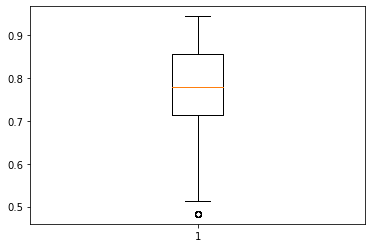

In [15]:
plt.boxplot(df_hdi['HDI for year'])
plt.show()

In [16]:
# Removing outliers from the suicide dataframe with respect to suicides/100k pop
sMean = df['suicides/100k pop'].mean()
df_o = df.copy()
sigma=df_o['suicides/100k pop'].std()
print(sigma)
for i in range(len(df['suicides/100k pop'])):
    if(df_o['suicides/100k pop'][i] > (sMean + 6*sigma)):
        df_o.drop([i], inplace=True)
df_o.reset_index(inplace=True)
df_o.drop('index', axis=1, inplace=True)
df_o

18.96151101450304


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27768,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27769,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27770,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [17]:
# Removing outliers from the HDI dataframe with respect to HDI for year
hMean = df_hdi['HDI for year'].mean()
df_hdi_o = df_hdi.copy()
sigma=df_hdi['HDI for year'].std()
print(sigma)
for i in range(len(df_hdi['HDI for year'])):
    if(df_hdi['HDI for year'][i] > (hMean + 6*sigma)):
        df_hdi_o.drop([i], inplace=True)
df_hdi_o.reset_index(inplace=True)
df_hdi_o.drop(['level_0', 'index'], axis=1, inplace = True)
df_hdi_o

0.09336670859029964


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1995,male,25-34 years,13,232900,5.58,0.619,"2,424,499,009",835,Generation X
1,Albania,1995,male,55-74 years,9,178000,5.06,0.619,"2,424,499,009",835,Silent
2,Albania,1995,female,75+ years,2,40800,4.90,0.619,"2,424,499,009",835,G.I. Generation
3,Albania,1995,female,15-24 years,13,283500,4.59,0.619,"2,424,499,009",835,Generation X
4,Albania,1995,male,15-24 years,11,241200,4.56,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
8359,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
8360,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
8361,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
8362,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [18]:
# No outliers found in HDI dataframe

## Normalization  
Mean and variance of certain features of both dataframes before normalization

In [19]:
df_o[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].mean()

suicides_no           2.422547e+02
population            1.847504e+06
suicides/100k pop     1.257224e+01
gdp_per_capita ($)    1.687476e+04
dtype: float64

In [20]:
df_o[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].var()

suicides_no           8.147871e+05
population            1.532411e+13
suicides/100k pop     3.248563e+02
gdp_per_capita ($)    3.571339e+08
dtype: float64

In [21]:
df_hdi_o[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']].mean()

suicides_no           2.061243e+02
population            1.852173e+06
suicides/100k pop     1.199194e+01
HDI for year          7.766011e-01
gdp_per_capita ($)    2.107437e+04
dtype: float64

In [22]:
df_hdi_o[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']].var()

suicides_no           4.637671e+05
population            1.575894e+13
suicides/100k pop     3.014311e+02
HDI for year          8.717342e-03
gdp_per_capita ($)    5.098197e+08
dtype: float64

Scaling data in suicide dataframe to range from 0 to 1

In [23]:
from sklearn.preprocessing import MinMaxScaler
col = ['suicides_no','population','suicides/100k pop', 'gdp_per_capita ($)']
data = df_o[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df_o.index)
df_normalized = df_normalized.rename(columns={'suicides_no':'n_suicides_no', 'population':'n_population', 'suicides/100k pop':'n_suicides/100k pop', 'gdp_per_capita ($)':'n_gdp_per_capita ($)'})
df_o = pd.concat([df_o, df_normalized],axis=1)
df_o

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,n_suicides_no,n_population,n_suicides/100k pop,n_gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,0.000940,0.007137,0.053347,0.004322
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,0.000716,0.007025,0.041263,0.004322
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,0.000627,0.006607,0.038400,0.004322
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,0.000045,0.000491,0.036492,0.004322
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,0.000403,0.006256,0.026077,0.004322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,0.004790,0.082652,0.023533,0.016320
27768,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,0.000403,0.007949,0.020512,0.016320
27769,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,0.002686,0.063050,0.017252,0.016320
27770,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,0.001970,0.060069,0.013277,0.016320


suicides_no


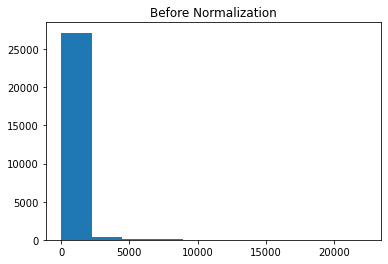

population


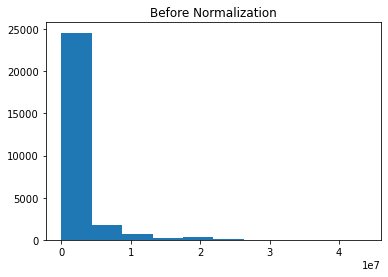

suicides/100k pop


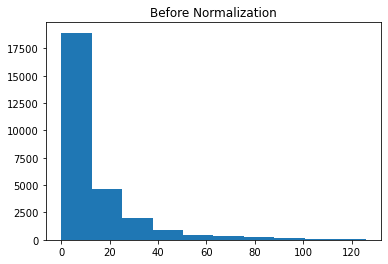

gdp_per_capita ($)


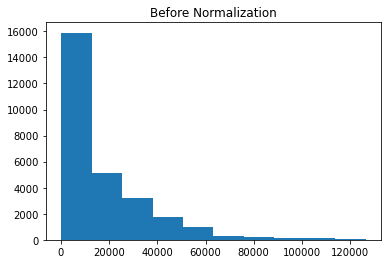

In [24]:
data = df_o[['suicides_no','population','suicides/100k pop', 'gdp_per_capita ($)']]
for i in data:
    print(i)
    plt.hist(df_o[i])
    plt.title('Before Normalization')
    plt.show()

n_suicides_no


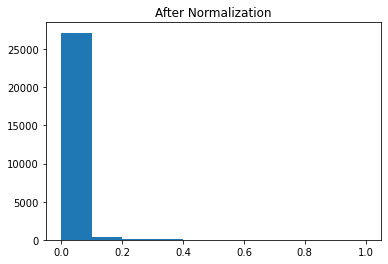

n_population


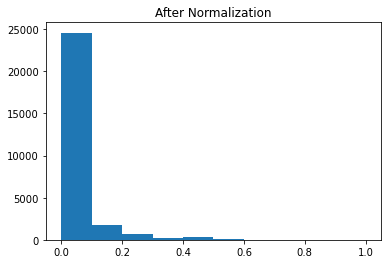

n_suicides/100k pop


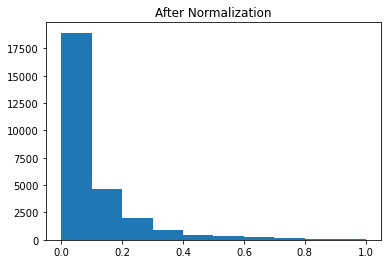

n_gdp_per_capita ($)


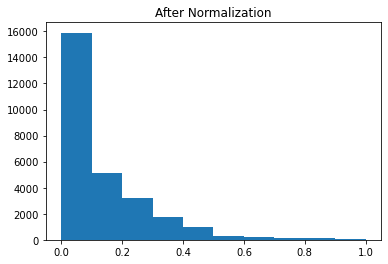

In [25]:
data = df_o[['n_suicides_no','n_population','n_suicides/100k pop', 'n_gdp_per_capita ($)']]
for i in data:
    print(i)
    plt.hist(df_normalized[i])
    plt.title('After Normalization')
    plt.show()

In [26]:
print(df_normalized.mean().round(decimals=1))
print(df_normalized.var().round(decimals=1))

n_suicides_no           0.0
n_population            0.0
n_suicides/100k pop     0.1
n_gdp_per_capita ($)    0.1
dtype: float64
n_suicides_no           0.0
n_population            0.0
n_suicides/100k pop     0.0
n_gdp_per_capita ($)    0.0
dtype: float64


Scaling data in HDI dataframe to range from 0 to 1

In [27]:
from sklearn.preprocessing import MinMaxScaler
cols=['suicides_no','population','suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']
data1 = df_hdi_o[cols]
h = data1.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
h_scaled = min_max_scaler.fit_transform(h)
df_hdi_normalized = pd.DataFrame(h_scaled,columns=cols,index=df_hdi_o.index)
df_hdi_normalized = df_hdi_normalized.rename(columns={'suicides_no':'n_suicides_no', 'population':'n_population', 'suicides/100k pop':'n_suicides/100k pop', 'HDI for year':'n_HDI for year', 'gdp_per_capita ($)':'n_gdp_per_capita ($)'})
df_hdi_o = pd.concat([df_hdi_o, df_hdi_normalized],axis=1)
df_hdi_o

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,n_suicides_no,n_population,n_suicides/100k pop,n_HDI for year,n_gdp_per_capita ($)
0,Albania,1995,male,25-34 years,13,232900,5.58,0.619,"2,424,499,009",835,Generation X,0.001105,0.005333,0.029830,0.295011,0.004142
1,Albania,1995,male,55-74 years,9,178000,5.06,0.619,"2,424,499,009",835,Silent,0.000765,0.004071,0.027050,0.295011,0.004142
2,Albania,1995,female,75+ years,2,40800,4.90,0.619,"2,424,499,009",835,G.I. Generation,0.000170,0.000918,0.026195,0.295011,0.004142
3,Albania,1995,female,15-24 years,13,283500,4.59,0.619,"2,424,499,009",835,Generation X,0.001105,0.006496,0.024538,0.295011,0.004142
4,Albania,1995,male,15-24 years,11,241200,4.56,0.619,"2,424,499,009",835,Generation X,0.000935,0.005524,0.024377,0.295011,0.004142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X,0.009093,0.083201,0.015824,0.416486,0.015836
8360,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent,0.000765,0.007989,0.013792,0.416486,0.015836
8361,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z,0.005099,0.063465,0.011601,0.416486,0.015836
8362,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z,0.003739,0.060465,0.008928,0.416486,0.015836


suicides_no


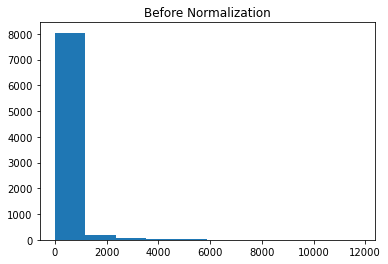

population


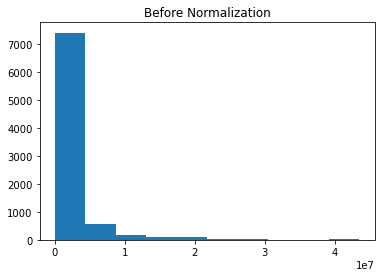

suicides/100k pop


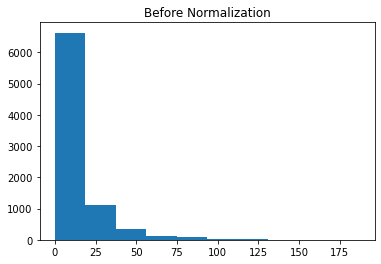

HDI for year


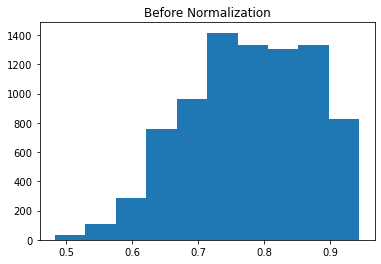

gdp_per_capita ($)


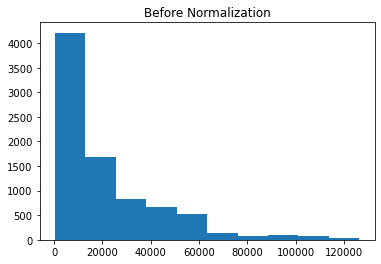

In [28]:
data = df_hdi_o[['suicides_no','population','suicides/100k pop','HDI for year', 'gdp_per_capita ($)']]
for i in data:
    print(i)
    plt.hist(df_hdi_o[i])
    plt.title('Before Normalization')
    plt.show()

n_suicides_no


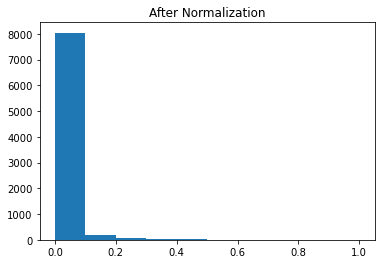

n_population


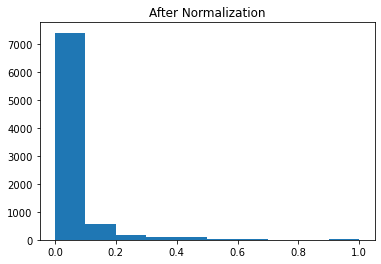

n_suicides/100k pop


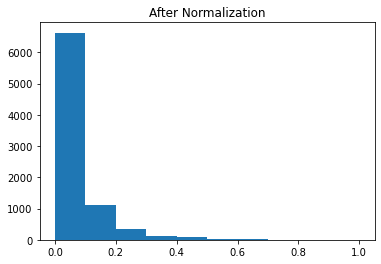

n_HDI for year


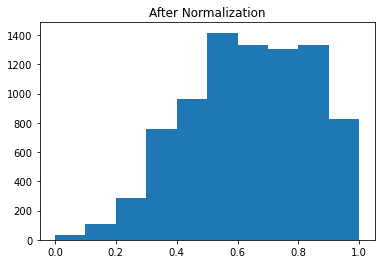

n_gdp_per_capita ($)


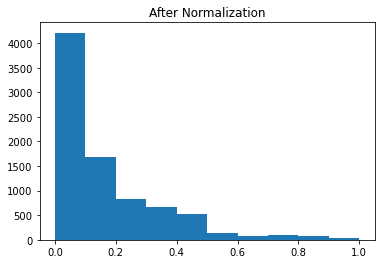

In [29]:
data = df_hdi_o[['n_suicides_no','n_population','n_suicides/100k pop', 'n_HDI for year', 'n_gdp_per_capita ($)']]
for i in data:
    print(i)
    plt.hist(df_hdi_normalized[i])
    plt.title('After Normalization')
    plt.show()

In [30]:
print(df_hdi_normalized.mean().round(decimals=1))
print(df_hdi_normalized.var().round(decimals=1))

n_suicides_no           0.0
n_population            0.0
n_suicides/100k pop     0.1
n_HDI for year          0.6
n_gdp_per_capita ($)    0.2
dtype: float64
n_suicides_no           0.0
n_population            0.0
n_suicides/100k pop     0.0
n_HDI for year          0.0
n_gdp_per_capita ($)    0.0
dtype: float64


## Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(s)
df_std = pd.DataFrame(scaled)
df_std = df_std.rename(columns={0:'suicides_no', 1:'population', 2:'suicides/100k pop', 3:'gdp_per_capita ($)'})
df_std

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,-0.245120,-0.392027,-0.325257,-0.850834
1,-0.250659,-0.393279,-0.409591,-0.850834
2,-0.252875,-0.397954,-0.429565,-0.850834
3,-0.267277,-0.466391,-0.442881,-0.850834
4,-0.258414,-0.401888,-0.515564,-0.850834
...,...,...,...,...
27767,-0.149844,0.453012,-0.533319,-0.770771
27768,-0.258414,-0.382942,-0.554403,-0.770771
27769,-0.201913,0.233656,-0.577151,-0.770771
27770,-0.219639,0.200304,-0.604892,-0.770771


suicides_no


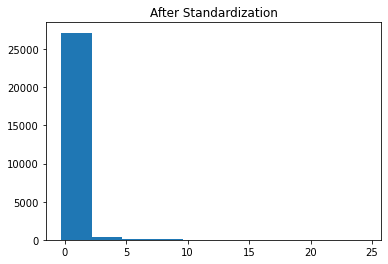

population


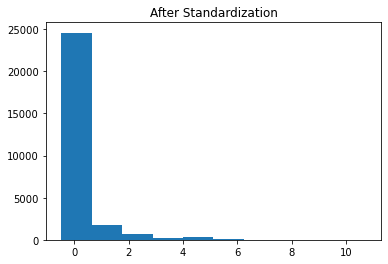

suicides/100k pop


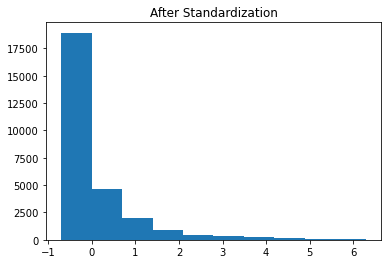

gdp_per_capita ($)


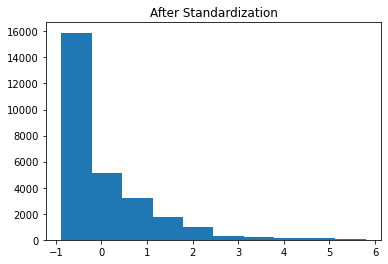

In [32]:
for i in df_std:
    print(i)
    plt.hist(df_std[i])
    plt.title('After Standardization')
    plt.show()

In [33]:
df_std.mean().round(decimals=1)

suicides_no          -0.0
population           -0.0
suicides/100k pop     0.0
gdp_per_capita ($)   -0.0
dtype: float64

In [34]:
df_std.var().round(decimals=1)

suicides_no           1.0
population            1.0
suicides/100k pop     1.0
gdp_per_capita ($)    1.0
dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(h)
df_hdi_std = pd.DataFrame(scaled)
df_hdi_std = df_hdi_std.rename(columns={0:'suicides_no', 1:'population', 2:'suicides/100k pop', 3:'HDI for year', 4:'gdp_per_capita ($)'})
df_hdi_std

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,-0.283604,-0.407927,-0.369336,-1.688081,-0.896427
1,-0.289478,-0.421758,-0.399288,-1.688081,-0.896427
2,-0.299758,-0.456321,-0.408504,-1.688081,-0.896427
3,-0.283604,-0.395180,-0.426361,-1.688081,-0.896427
4,-0.286541,-0.405836,-0.428089,-1.688081,-0.896427
...,...,...,...,...,...
8359,-0.145565,0.445560,-0.520251,-1.088260,-0.831141
8360,-0.289478,-0.378814,-0.542139,-1.088260,-0.831141
8361,-0.214585,0.229243,-0.565756,-1.088260,-0.831141
8362,-0.238081,0.196353,-0.594556,-1.088260,-0.831141


suicides_no


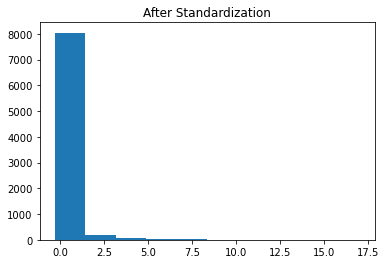

population


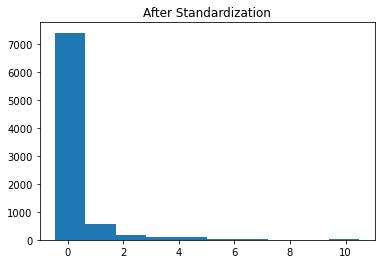

suicides/100k pop


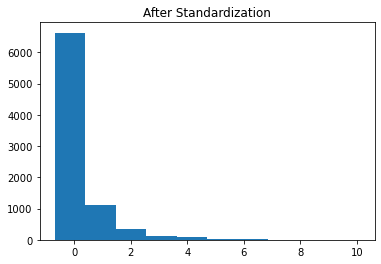

HDI for year


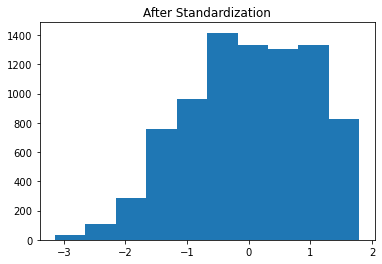

gdp_per_capita ($)


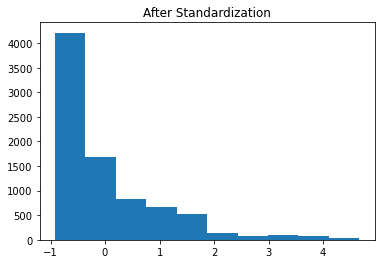

In [36]:
for i in df_hdi_std:
    print(i)
    plt.hist(df_hdi_std[i])
    plt.title('After Standardization')
    plt.show()

In [37]:
df_hdi_std.mean().round(decimals=1)

suicides_no          -0.0
population            0.0
suicides/100k pop    -0.0
HDI for year         -0.0
gdp_per_capita ($)    0.0
dtype: float64

In [38]:
df_hdi_std.var().round(decimals=1)

suicides_no           1.0
population            1.0
suicides/100k pop     1.0
HDI for year          1.0
gdp_per_capita ($)    1.0
dtype: float64

## Correlation

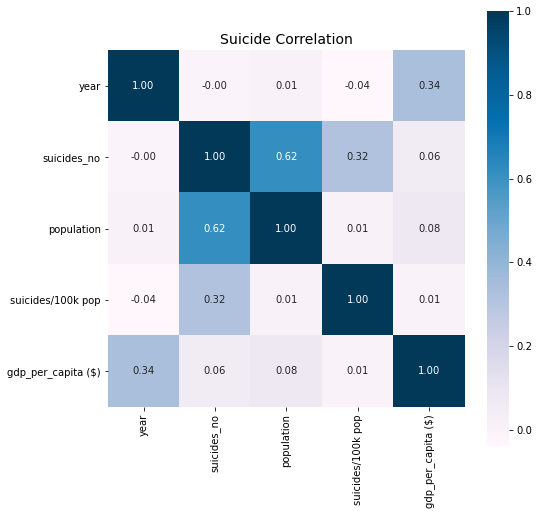

In [39]:
# Correlating numeric data
df_c=df_o.copy()
#drop normalized data
df_c.drop(['n_suicides_no','n_population','n_suicides/100k pop','n_gdp_per_capita ($)'], axis=1, inplace=True) 
dataCorr = df_c.corr()
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

From the above chart we can infer:
* population is positively correlated to suicides_no with a correlation factor of 0.62
* suicides/100k pop is negatively correlated to year with a correlation factor of -0.04

## Data Visualization

,country,suicides/100k pop
52,Lithuania,37.676471
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
11,Belarus,31.075913
47,Kazakhstan,30.511282


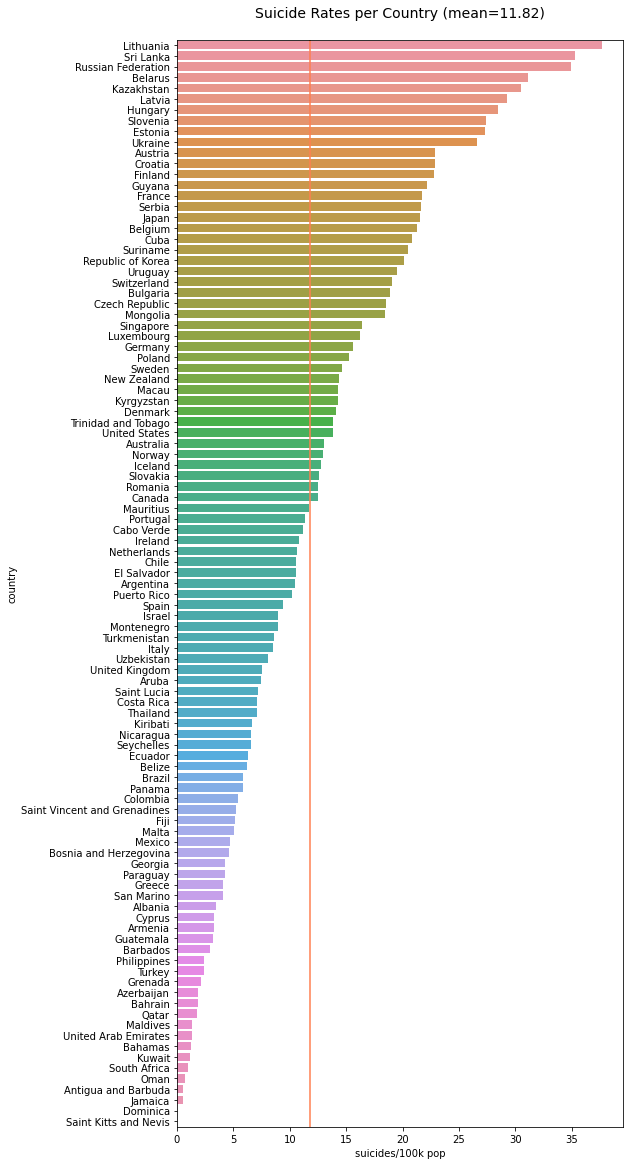

In [41]:
# Using suicide dataframe
sRate = df_o['suicides/100k pop'].groupby(df_o['country']).mean().reset_index()
sMean = sRate['suicides/100k pop'].mean() #global mean
sRate = sRate.sort_values('suicides/100k pop', ascending=False)
plt.figure(figsize=(8,20))
plt.title('Suicide Rates per Country (mean={:.2f})\n'.format(sMean), fontsize=14)
plt.axvline(x=sMean,color='coral')
sns.barplot(data=sRate, y='country',x='suicides/100k pop')
sRate.head()

From the above graph we can infer: 
* Top three countries with the highest suicide rate: Lithunaia, Russiun Federation, Sri Lanka
* Bottom three countries with the lowest suicides rate: Jamaica, Dominica, Saint Kitts and Nevis
* the global mean suicide rate is 11.82

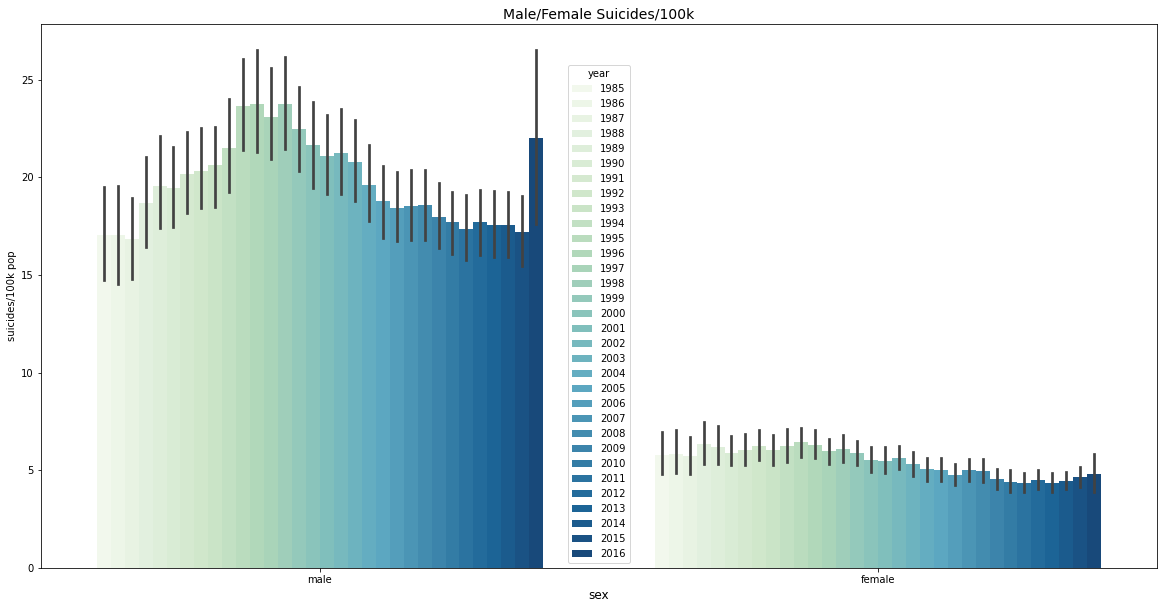

In [42]:
# Using suicide dataframe
fig = plt.figure(figsize=(20,10))
plt.title('Male/Female Suicides/100k', fontsize=14)
plt.xlabel('age', fontsize=12)
sns.barplot(data=df_o, x='sex',y='suicides/100k pop', hue='year',palette='GnBu')
plt.show()

From the above graph we can infer:
* Males are more likely to commit suicide than females
* Suicide rate of females was highest in the year 1995
* Suicide rate of males was highest in the year 1997 and 1995

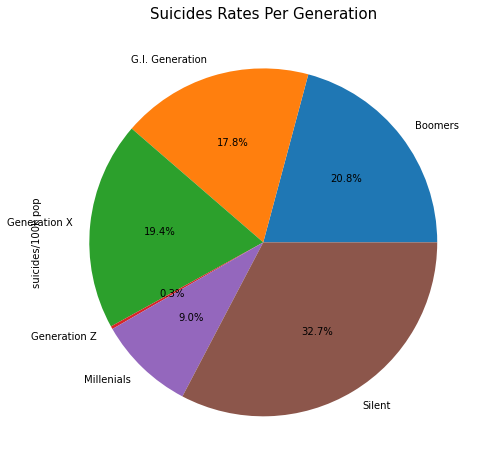

In [43]:
# Using suicide dataframe
ax=df_o.groupby(['generation'])['suicides/100k pop'].sum().plot.pie(figsize=(8,8), autopct='%1.1f%%')
plt.title("Suicides Rates Per Generation",fontsize=15)
plt.show()

From the above graph we can infer:
* The Silent generation is most likely to commit suicide
* Although, the plot shows that Generation Z committed the least number of suicides, on visual analysis of the data – we found that there was very little data in the dataset to conclude.  Hence, we infer that the Millennials committed the least number of suicides.

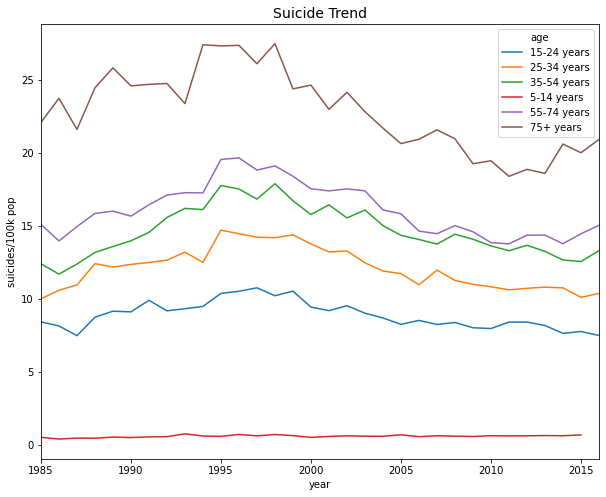

In [44]:
# Using suicide dataframe
df_sort = df_o.sort_values(by='age')  # sort by age
plt.figure(figsize=(10,8))
plt.title('Suicide Trend', fontsize=14)
plt.xlim(1985,2016)
sns.lineplot(data=df_sort,x='year',y='suicides/100k pop',hue='age',ci=None)
plt.show()

From the above graph we can infer:
* people in the age group of '75+ years' are most likely to commit suicide
* next in the list, is people in the age group of '55-74 years'

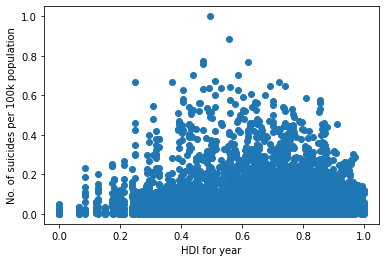

In [45]:
# Using HDI dataframe
plt.scatter(df_hdi_o['n_HDI for year'], df_hdi_o['n_suicides/100k pop'])
plt.xlabel('HDI for year')
plt.ylabel('No. of suicides per 100k population')
plt.show()

From the above graph we can infer:
* suicide rate is low for countries with lower HDI
* suicide rate increases as HDI for year increase

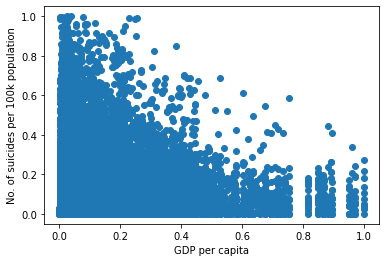

In [46]:
# Using HDI dataframe
plt.scatter(df_o['n_gdp_per_capita ($)'], df_o['n_suicides/100k pop'])
plt.xlabel('GDP per capita')
plt.ylabel('No. of suicides per 100k population')
plt.show()

From the above graph we can infer:
* The suicide rate is high for lower GDP per capita
* The suicide rate decrease as the GDP per capita increase

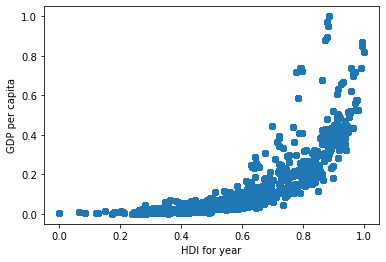

In [47]:
# Using HDI dataframe
plt.scatter(df_hdi_o['n_HDI for year'], df_hdi_o['n_gdp_per_capita ($)'])
plt.ylabel('GDP per capita')
plt.xlabel('HDI for year')
plt.show()

From the above graph we can infer:
* HDI increase exponentially with gdp

## Hypothesis testing  
Looking at the dataset we assume that the Suicide rate in Italy is low. We assume that the average suide rate in Ukraine is more than 11.82.  
#### Solution:
Null hypothesis: $\bar{x}$ < 11.82   
Alternate hypothesis: $\bar{x}$ >= 11.82   
$\alpha$ = 0.05

In [48]:
from scipy.stats import norm
def one_sided_hypo(sample_mean, pop_mean, pop_std, n, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (pop_std/np.sqrt(n))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

df_ukraine = df_o.loc[df_o['country'] == 'Ukraine']
alpha = 0.05
sample = df_ukraine['suicides/100k pop'].sample(200)
sample_mean = sample.mean()
pop_mean = sMean # global mean
n =  200
pop_std = df_o['suicides/100k pop'].std()

reject = one_sided_hypo(sample_mean, pop_mean, pop_std, n, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Accept NULL hypothesis')

actual z value : 1.6448536269514729
hypothesis z value : 10.666910999786202 

Reject NULL hypothesis


#### Conclusion:  
From the above testing we can conclude that the suicide rates in Ukraine is more than the global mean of suicide rates(11.82).